In [1]:
import numpy as np 
from scipy.stats import t,norm
import math
import matplotlib.pyplot as plt 
from dataclasses import dataclass

def plotter(x,bins=20):
    counts, bins = np.histogram(x,bins=bins)
    plt.hist(bins[:-1],len(bins)-1,weights=counts)
    plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
    # plt.axvline(m+s, color='r', linestyle='dashed', linewidth=1)
    # plt.axvline(m-s, color='r', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(x.mean()*1.01, max_ylim*0.95, 'Mean: {:.2f}'.format(x.mean())) 



 # BERNOULLI DISTRIBUTION
 Lets take 1 Bernoulli sample with size var:sample_size and probability of var:p

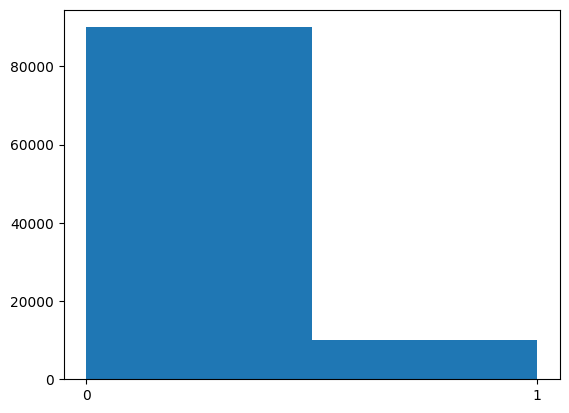

In [2]:
sample_size=100000
p=0.1
# Take a sample with size sample_size from a bernoulli distribution. n=1 because each trial is a binary event
x = np.random.binomial(n=1,p=p,size=sample_size) 
counts, bins = np.histogram(x,2)
pl=plt.hist([0,1],2,weights=counts)
locs, labels = plt.xticks()
pl=plt.xticks([0,1])


 Bernoulli distribution is just a distribution over 1-s and 0-s with certain probability of getting a 1.

 Hereby I generate 1000 samples from bernoulli distribution. 1 sample has var:sample_size elements, e.g. 1 sample includes multiple drawings from the Bernoulli distributed random variable.
 This means a **sample** is a combination of multiple events. Each event is some realization of X. [More information on this](https://github.com/AndresNamm/study/blob/main/statistics/random_variables.md)

 Next, Ill plot the means of all the samples. This based on CLT should have a normal distribution. [Read more about CLT here](https://github.com/AndresNamm/study/tree/main/statistics/confidence_intervals)

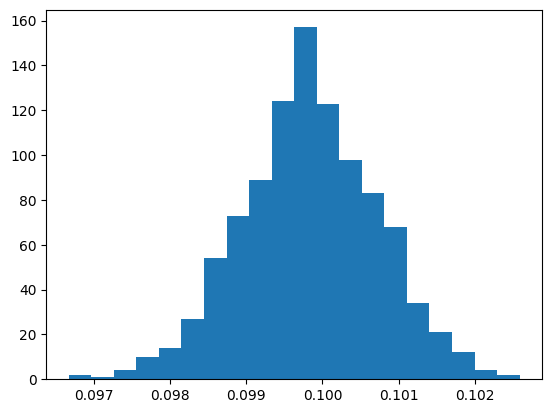

In [3]:

bin_means=[]
for probability in range(1000):
    x = np.random.binomial(n=1,p=p,size=sample_size)
    bin_means.append(x.mean())

bin_means=np.asarray(bin_means)
counts, bins = np.histogram(bin_means,bins=20)
pl=plt.hist(bins[:-1],len(bins)-1,weights=counts)


 Now I take another 1 Bernoulli sample with size n. This is what we do in a regular experiment.

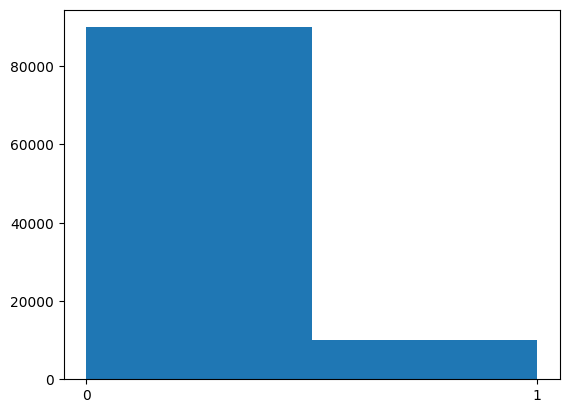

In [4]:
x = np.random.binomial(n=1,p=p,size=sample_size)
counts, bins = np.histogram(x,2)
pl=plt.hist([0,1],2,weights=counts)
locs, labels = plt.xticks()
pl=plt.xticks([0,1])

 Now I'll plot the confidence interval based on t on top of the samples

STD:0.30000000000000004
E:0.0018594076027474602


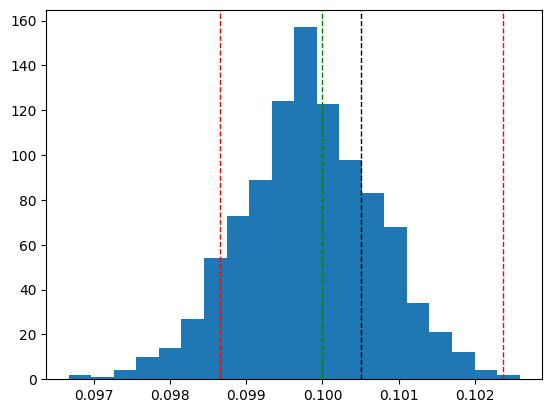

In [5]:

confidence_interval=0.95
alpha=1-confidence_interval
degrees_of_freedom=sample_size-1
T=float(np.abs(t.ppf(alpha/2,degrees_of_freedom))) # t_val - based on confidence we have chosen, how many standard distributions is the ci width. If Confidence is 95%, then std is  ~2
std = np.sqrt(p*(1-p))
E = T * std/np.sqrt(sample_size)
print(f"STD:{std}")
print(f"E:{E}")

counts, bins = np.histogram(bin_means,bins=20)
conf_plot = plt.hist(bins[:-1],len(bins)-1,weights=counts)
sample_mean=x.mean()

l=plt.axvline(bin_means.mean(), color='g', linestyle='dashed', linewidth=1)
l=plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
l=plt.axvline(x.mean()+E, color='r', linestyle='dashed', linewidth=1)
l=plt.axvline(x.mean()-E, color='r', linestyle='dashed', linewidth=1)




In [6]:
times=200
outside=0
for probability in range(times):
    bernoulli_sample = np.random.binomial(n=1,p=p,size=sample_size)
    if np.abs(bernoulli_sample.mean())>np.abs(x.mean()+E):
        outside+=1.0
print(f"Sample mean outside the interval {outside/times} times. Expected to be at max {(1-confidence_interval)/2} times")

    

Sample mean outside the interval 0.015 times. Expected to be at max 0.025000000000000022 times


 STD and MEAN for Bernoulli distribution based on its standard deviation formula with different probabilities.

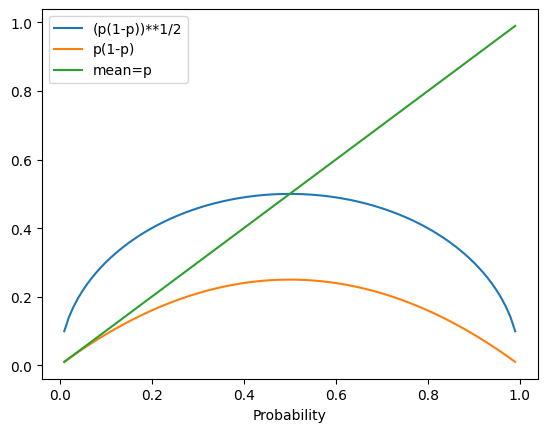

In [7]:
probability = 0.01
x_scale=[]
y_scale=[]
y_scale2=[]

while probability < 1.0:
    x_scale.append(probability)
    y_scale.append(np.sqrt(probability*(1-probability)))
    y_scale2.append(probability*(1-probability))
    probability+=0.01

pl = plt.plot(x_scale,y_scale,label="(p(1-p))**1/2")
pl = plt.plot(x_scale,y_scale2,label="p(1-p)")
pl = plt.plot(x_scale,x_scale,label="mean=p")
xlbl = plt.xlabel("Probability")
leg = plt.legend()



 It makes sense that STD is highest when probability = 0.5. In this case the mean is 0.5 and the deviation from the mean for each variable we get is 0.5.

# BINOMIAL DISTRIBUTION

 Plotting a binomial distribution over 100 samples where
 we conduct 1000 experiments in each sample and measure the amount of successes.

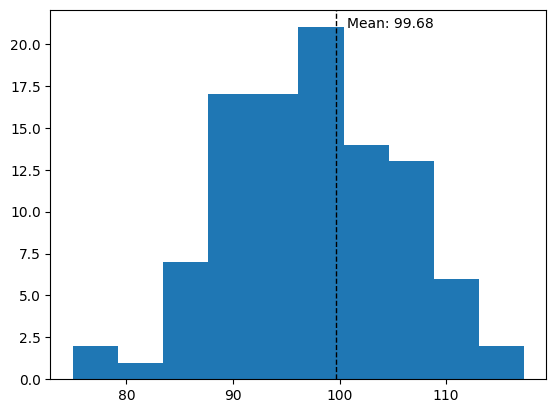

In [8]:
x = np.random.binomial(1000,p=0.1,size=100)
plotter(x,bins=10)

In [9]:
import numpy as np

#Traditional method
p = 0.001
n = 1000
alpha = 0.05
z = 1.96  #critical value for 95% confidence interval
stdev = np.sqrt(p*(1-p)/n)

lower_bound_trad = p - z*stdev
upper_bound_trad = p + z*stdev

print("Traditional Method")
print(f"Lower bound: {lower_bound_trad:.5f}")
print(f"Upper bound: {upper_bound_trad:.5f}")

#Wilson Score interval method

lower_bound_wilson = (p + (z**2)/(2*n) - z*np.sqrt(p*(1-p)/n + (z**2)/(4*n**2)))/(1+(z**2)/n)
upper_bound_wilson = (p + (z**2)/(2*n) + z*np.sqrt(p*(1-p)/n + (z**2)/(4*n**2)))/(1+(z**2)/n)

print("\nWilson Score Interval Method")
print(f"Lower bound: {lower_bound_wilson:.5f}")
print(f"Upper bound: {upper_bound_wilson:.5f}")

Traditional Method
Lower bound: -0.00096
Upper bound: 0.00296

Wilson Score Interval Method
Lower bound: 0.00018
Upper bound: 0.00564
